In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random
import warnings

In [2]:
Dataset_WF_site1 = pd.read_excel(r'Wind farm site 1 (Nominal capacity-99MW).xlsx'
                                ).drop(index=0)
Dataset_WF_site2 = pd.read_excel(r'Wind farm site 2 (Nominal capacity-200MW).xlsx'
                                ).drop(index=0)
Dataset_WF_site3 = pd.read_excel(r'Wind farm site 3 (Nominal capacity-99MW).xlsx'
                                ).drop(index=0)

In [3]:
Dataset_WF_site1.dtypes

Time(year-month-day h:m:s)                        object
Wind speed at height of 10 meters (m/s)          float64
Wind direction at height of 10 meters (˚)        float64
Wind speed at height of 30 meters (m/s)          float64
Wind direction at height of 30 meters (˚)        float64
Wind speed at height of 50 meters (m/s)          float64
Wind direction at height of 50 meters (˚)        float64
Wind speed - at the height of wheel hub (m/s)    float64
Wind speed - at the height of wheel hub (˚)      float64
Air temperature  (°C)                            float64
Atmosphere (hpa)                                 float64
Relative humidity (%)                            float64
Power (MW)                                       float64
dtype: object

In [4]:
# Dataset_WF_site1['Time(year-month-day h:m:s)'] = pd.to_datetime(Dataset_WF_site1['Time(year-month-day h:m:s)'])

In [5]:
Features = ['Wind speed at height of 10 meters (m/s)', 'Wind speed at height of 30 meters (m/s)', 'Wind speed at height of 50 meters (m/s)', 'Wind speed - at the height of wheel hub (m/s)']
Target = ['Power (MW)']

In [6]:
# df2 = Dataset_WF_site1.drop(columns=['Wind direction at height of 10 meters (˚)','Wind direction at height of 30 meters (˚)','Wind direction at height of 50 meters (˚)','Atmosphere (hpa)','Relative humidity (%)','Air temperature  (°C) '],axis=1)
df2 = Dataset_WF_site1[Features + Target].copy()
df2 = df2.set_index(Dataset_WF_site1['Time(year-month-day h:m:s)'])
df2.index = pd.to_datetime(df2.index)

In [7]:
num_rows_with_zero = (df2 == 0).any(axis=1).sum()
print(f'Number of rows with zero values: {num_rows_with_zero}')

Number of rows with zero values: 3772


In [8]:
def interpolate_zeros(df):
    df_zero_rows = (df == 0).any(axis=1)
    df.loc[df_zero_rows] = df.loc[df_zero_rows].replace(0, np.nan).interpolate()
    return df

In [9]:
df2 = interpolate_zeros(df2)

In [10]:
train_size = int(len(df2) * 0.8)
train, test = df2.iloc[:train_size], df2.iloc[train_size:]

In [11]:
# df2['Time(year-month-day h:m:s)'] = pd.to_datetime(df2['Time(year-month-day h:m:s)'])
# df2.set_index('Time(year-month-day h:m:s)')

In [12]:
# df2 = df2.reset_index()

In [13]:
# df2.dtypes

In [14]:
# df2.index

In [15]:
# df2

In [16]:
y_train = train[Target]
X_train = train[Features]

In [17]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [18]:
X_train

,Wind speed at height of 10 meters (m/s),Wind speed at height of 30 meters (m/s),Wind speed at height of 50 meters (m/s),Wind speed - at the height of wheel hub (m/s)
Time(year-month-day h:m:s),,,,
2019-01-01 00:15:00,1.828,1.698,1.757,1.882
2019-01-01 00:30:00,2.193,2.313,2.344,2.350
2019-01-01 00:45:00,2.654,2.494,2.574,2.808
2019-01-01 01:00:00,2.249,2.192,2.558,2.924
2019-01-01 01:15:00,1.974,1.980,2.049,2.137
...,...,...,...,...
2020-08-07 18:00:00,10.784,11.415,11.496,11.671
2020-08-07 18:15:00,10.023,10.690,10.988,11.223
2020-08-07 18:30:00,7.721,8.126,8.576,8.672


In [19]:
X_train.isnull().sum()

Wind speed at height of 10 meters (m/s)          1
Wind speed at height of 30 meters (m/s)          6
Wind speed at height of 50 meters (m/s)          6
Wind speed - at the height of wheel hub (m/s)    2
dtype: int64

In [20]:
X_train = X_train.fillna(method='ffill')

In [21]:
X_test = test[Features]
y_test = test[Target]

In [22]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(estimator=lm, n_features_to_select=4)
rfe = rfe.fit(X_train, y_train)

In [23]:
X_train

,Wind speed at height of 10 meters (m/s),Wind speed at height of 30 meters (m/s),Wind speed at height of 50 meters (m/s),Wind speed - at the height of wheel hub (m/s)
Time(year-month-day h:m:s),,,,
2019-01-01 00:15:00,1.828,1.698,1.757,1.882
2019-01-01 00:30:00,2.193,2.313,2.344,2.350
2019-01-01 00:45:00,2.654,2.494,2.574,2.808
2019-01-01 01:00:00,2.249,2.192,2.558,2.924
2019-01-01 01:15:00,1.974,1.980,2.049,2.137
...,...,...,...,...
2020-08-07 18:00:00,10.784,11.415,11.496,11.671
2020-08-07 18:15:00,10.023,10.690,10.988,11.223
2020-08-07 18:30:00,7.721,8.126,8.576,8.672


In [24]:
X_train.columns[rfe.support_]

Index(['Wind speed at height of 10 meters (m/s)',
       'Wind speed at height of 30 meters (m/s)',
       'Wind speed at height of 50 meters (m/s)',
       'Wind speed - at the height of wheel hub (m/s)'],
      dtype='object')

In [25]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [26]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

In [27]:
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:             Power (MW)   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                 4.229e+04
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:45:06   Log-Likelihood:            -2.1844e+05
No. Observations:               56140   AIC:                         4.369e+05
Df Residuals:                   56135   BIC:                         4.369e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [29]:
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [30]:
checkVIF(X_train_new)

,Features,VIF
3,Wind speed at height of 50 meters (m/s),272.69
2,Wind speed at height of 30 meters (m/s),133.59
4,Wind speed - at the height of wheel hub (m/s),105.17
1,Wind speed at height of 10 meters (m/s),18.95
0,const,4.92


In [31]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_e = lm.predict(X_train_new)

In [32]:
y_train_e

Time(year-month-day h:m:s)
2019-01-01 00:15:00    -0.054256
2019-01-01 00:30:00     2.467229
2019-01-01 00:45:00     4.686170
2019-01-01 01:00:00     5.657399
2019-01-01 01:15:00     1.337193
                         ...    
2020-08-07 18:00:00    50.830714
2020-08-07 18:15:00    48.814647
2020-08-07 18:30:00    35.905830
2020-08-07 18:45:00    71.627028
2020-08-07 19:00:00    67.354641
Length: 56140, dtype: float64

In [33]:
X_train_new = X_train_new.drop('const',axis=1)
X_test_new = X_test[X_train_new.columns]
X_test_new = sm.add_constant(X_test_new)
y_pred = lm.predict(X_test_new)

In [39]:
y_pred.to_frame()

,0
Time(year-month-day h:m:s),
2020-08-07 19:15:00,54.088533
2020-08-07 19:30:00,38.937225
2020-08-07 19:45:00,43.524497
2020-08-07 20:00:00,35.264472
2020-08-07 20:15:00,33.110754
...,...
2020-12-31 22:45:00,25.149524
2020-12-31 23:00:00,23.898761
2020-12-31 23:15:00,12.964503


In [40]:
test['Pred'] = y_pred

/var/folders/tl/_v6g46bs3cx9m65hytfp0q1w0000gp/T/ipykernel_69578/3988313086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Pred'] = y_pred


In [41]:
test

,Wind speed at height of 10 meters (m/s),Wind speed at height of 30 meters (m/s),Wind speed at height of 50 meters (m/s),Wind speed - at the height of wheel hub (m/s),Power (MW),Pred
Time(year-month-day h:m:s),,,,,,
2020-08-07 19:15:00,11.194,11.724,12.060,12.220,66.998620,54.088533
2020-08-07 19:30:00,8.671,8.875,9.018,9.406,68.195920,38.937225
2020-08-07 19:45:00,8.941,9.309,9.880,10.129,61.050470,43.524497
2020-08-07 20:00:00,7.847,8.470,8.560,8.654,51.124560,35.264472
2020-08-07 20:15:00,7.132,7.484,7.701,8.287,40.859715,33.110754
...,...,...,...,...,...,...
2020-12-31 22:45:00,5.738,6.408,6.575,6.680,13.633642,25.149524
2020-12-31 23:00:00,5.748,6.231,6.372,6.448,6.869759,23.898761
2020-12-31 23:15:00,4.468,4.406,4.381,4.399,4.352931,12.964503


In [34]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.7267665674364067

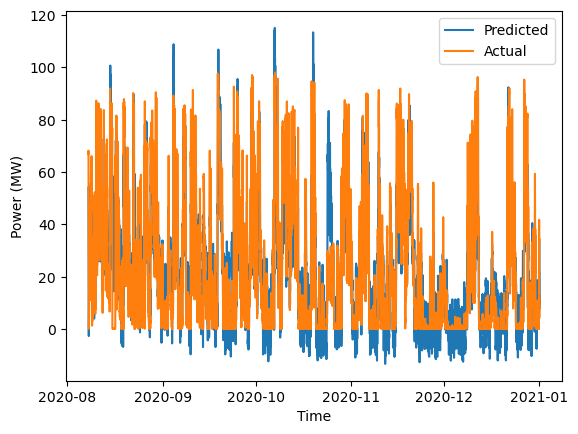

In [35]:

plt.plot(y_pred, label='Predicted')
plt.plot(test['Power (MW)'], label='Actual')
plt.xlabel('Time')
plt.ylabel('Power (MW)')
plt.legend()
plt.show()


In [37]:
from sktime.performance_metrics.forecasting import mean_absolute_error, mean_absolute_percentage_error, mean_absolute_scaled_error, MeanSquaredError, mean_relative_absolute_error, geometric_mean_absolute_error
print("MAE:",mean_absolute_error(test['Power (MW)'] ,y_pred))
print("MAPE",mean_absolute_percentage_error(test['Power (MW)'] ,y_pred))

MAE: 9.309443611652734
MAPE 6.4181522405934945


In [94]:
print("MAE",np.mean(np.abs(y_train - y_train_e )))
print("MAPE", np.mean(np.abs(y_train - y_train_e)/test)*100)

KeyboardInterrupt: 

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Reading Datasets
Dataset_WF_site1 = pd.read_excel(r'Wind farm site 1 (Nominal capacity-99MW).xlsx'
                                ).drop(index=0)
Dataset_WF_site2 = pd.read_excel(r'Wind farm site 2 (Nominal capacity-200MW).xlsx'
                                ).drop(index=0)
Dataset_WF_site2.rename(columns={'Wind speed - at the height of wheel hub  (m/s)': 'Wind speed - at the height of wheel hub (m/s)'}, inplace=True)
Dataset_WF_site3 = pd.read_excel(r'Wind farm site 3 (Nominal capacity-99MW).xlsx'
                                ).drop(index=0)


In [60]:
def interpolate_zeros(df):
    df_zero_rows = (df == 0).any(axis=1)
    df.loc[df_zero_rows] = df.loc[df_zero_rows].replace(0, np.nan).interpolate()
    return df

def calc_err_metrics(pred, train=None, test=None):
    print("MAPE: ", mean_absolute_percentage_error(test, pred))
    print("MAE: ", mean_absolute_error(test, pred))
    print("MASE: ", mean_absolute_scaled_error(test, pred, y_train=train))
    print("MSE: ", mean_squared_error(test,pred))
    rmse = MeanSquaredError(square_root=True)
    print("RMSE: ", rmse(test, pred))

def plot_data(test):
    plt.plot(test['Pred'], label='Predicted')
    plt.plot(test['Power (MW)'], label='Actual')
    plt.xlabel('Time')
    plt.ylabel('Power (MW)')
    plt.legend()
    plt.show()

    ax = test.loc[(test.index > '09-01-2020 23:45:00') & (test.index < '09-02-2020 23:45:00')]['Power (MW)'].plot(figsize=(15, 5), title='24 Hours Of Data')
    test.loc[(test.index > '09-01-2020 23:45:00') & (test.index < '09-02-2020 23:45:00')]['Pred'].plot()
    plt.legend(['Truth Data','Prediction'])
    plt.show()

    ax = test.loc[(test.index > '09-01-2020 23:45:00') & (test.index < '09-02-2020 11:45:00')]['Power (MW)'].plot(figsize=(15, 5), title='12 Hours Of Data')
    test.loc[(test.index > '09-01-2020 23:45:00') & (test.index < '09-02-2020 11:45:00')]['Pred'].plot()
    plt.legend(['Truth Data','Prediction'])
    plt.show()

    ax = test.loc[(test.index > '09-01-2020 23:45:00') & (test.index < '09-02-2020 05:45:00')]['Power (MW)'].plot(figsize=(15, 5), title='6 Hours Of Data')
    test.loc[(test.index > '09-01-2020 23:45:00') & (test.index < '09-02-2020 05:45:00')]['Pred'].plot()
    plt.legend(['Truth Data','Prediction'])
    plt.show()

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

def compute_forecast(df) -> pd.DataFrame:
    #Preprocessing data
    Features = ['Wind speed at height of 10 meters (m/s)', 'Wind speed at height of 30 meters (m/s)', 'Wind speed at height of 50 meters (m/s)', 'Wind speed - at the height of wheel hub (m/s)']
    Target = ['Power (MW)']

    df2 = df[Features + Target].copy()
    df2 = df2.set_index(df['Time(year-month-day h:m:s)'])
    df2.index = pd.to_datetime(df2.index)

    #Interpolate zero values
    df2 = interpolate_zeros(df2)
    df2.fillna(method='ffill', inplace=True)
    
    #Compute train and test sets
    train_size = int(len(df2) * 0.75)
    train, test = df2.iloc[:train_size], df2.iloc[train_size:]
    X_train = train[Features]
    y_train = train[Target]
    X_test = test[Features]
    y_test = test[Target]

    #Perform RFE
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    rfe = RFE(estimator=lm, n_features_to_select=4)
    rfe = rfe.fit(X_train, y_train)

    X_train_rfe = X_train[X_train.columns[rfe.support_]]

    #Create and fit linear regression model on training set
    X_train_new = sm.add_constant(X_train_rfe) #Adding the constant
    lm = sm.OLS(y_train, X_train_new).fit() # fitting the model
    print(lm.summary())

    print('VIF: \n',checkVIF(X_train))

    #Make predictions on test set
    X_train_new = X_train_new.drop('const',axis=1)
    X_test_new = X_test[X_train_new.columns]
    X_test_new = sm.add_constant(X_test_new)
    y_pred = lm.predict(X_test_new)

    test['Pred'] = y_pred

    #Plotting the results
    plot_data(test)

    #Calculate error metrics
    calc_err_metrics(test=test['Power (MW)'].to_frame(), pred=test['Pred'].to_frame(), train=train['Power (MW)'].to_frame())

                            OLS Regression Results                            
Dep. Variable:             Power (MW)   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                 3.905e+04
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        10:55:22   Log-Likelihood:            -2.0467e+05
No. Observations:               52631   AIC:                         4.094e+05
Df Residuals:                   52626   BIC:                         4.094e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

/var/folders/tl/_v6g46bs3cx9m65hytfp0q1w0000gp/T/ipykernel_69578/3594106029.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Pred'] = y_pred


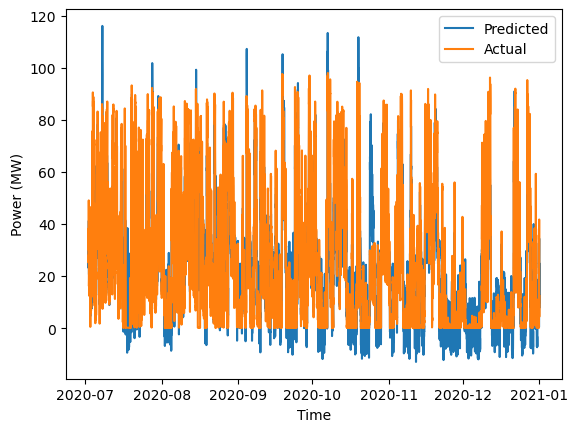

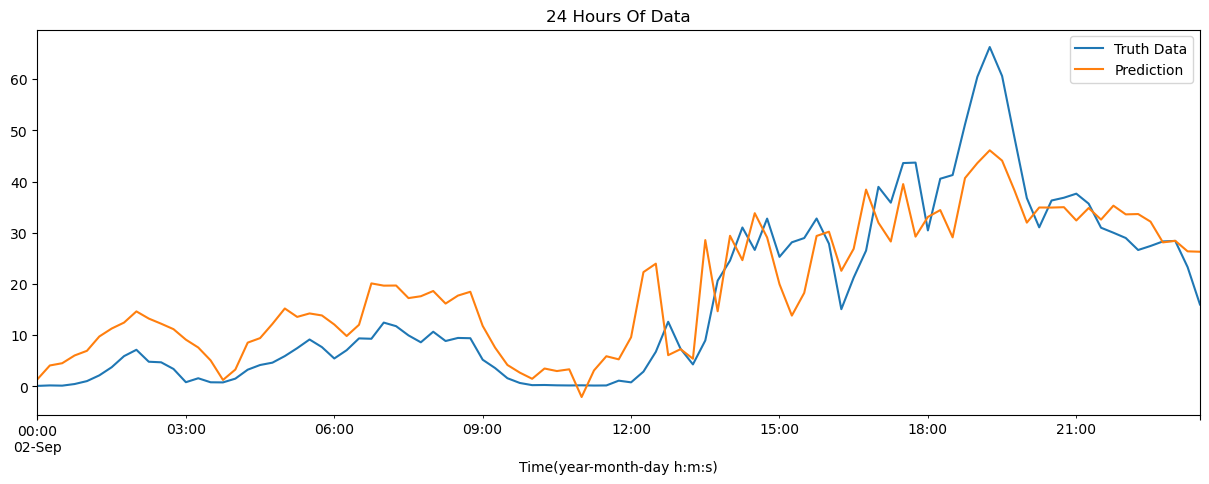

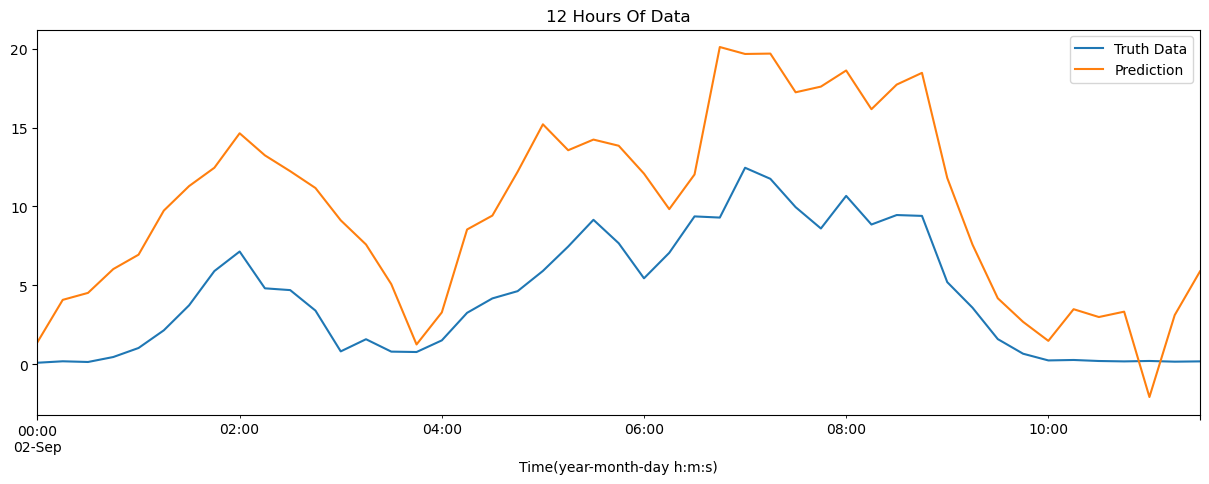

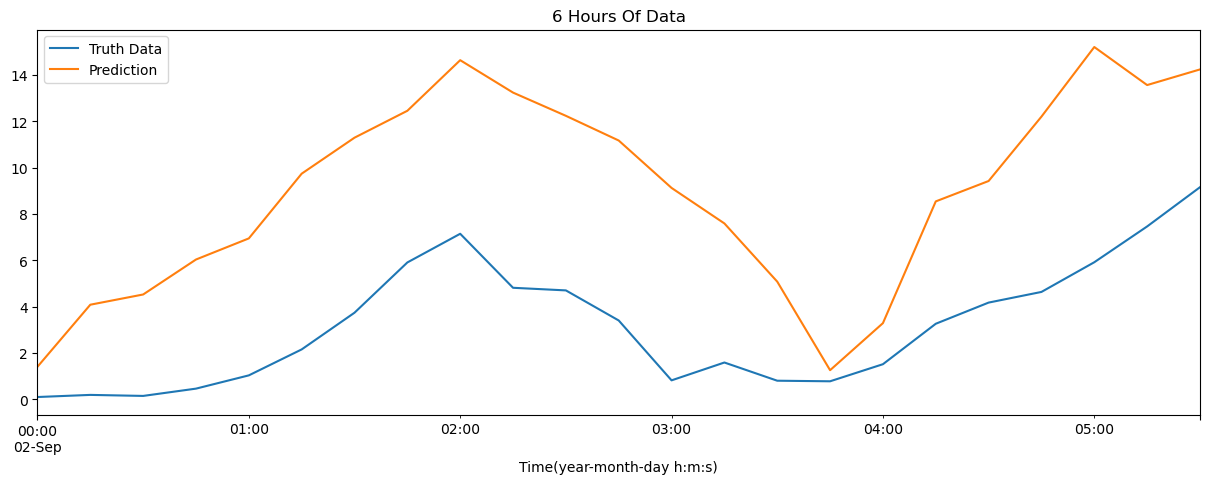

MAPE:  6.306748041369399
MAE:  9.360574216293212
MASE:  3.6266491151956814
MSE:  174.78873039861293
RMSE:  13.220768903456898


/Users/Gautam/anaconda3arm/anaconda3/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:477: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(


In [61]:
compute_forecast(Dataset_WF_site1)

                            OLS Regression Results                            
Dep. Variable:             Power (MW)   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                 1.607e+04
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        10:04:37   Log-Likelihood:            -2.6525e+05
No. Observations:               52631   AIC:                         5.305e+05
Df Residuals:                   52626   BIC:                         5.306e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

/var/folders/tl/_v6g46bs3cx9m65hytfp0q1w0000gp/T/ipykernel_69578/2579641709.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Pred'] = y_pred


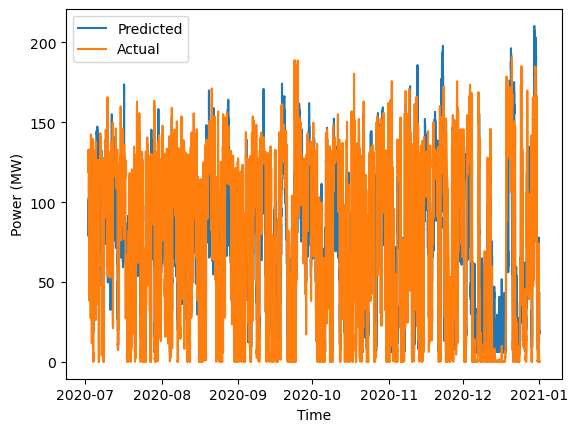

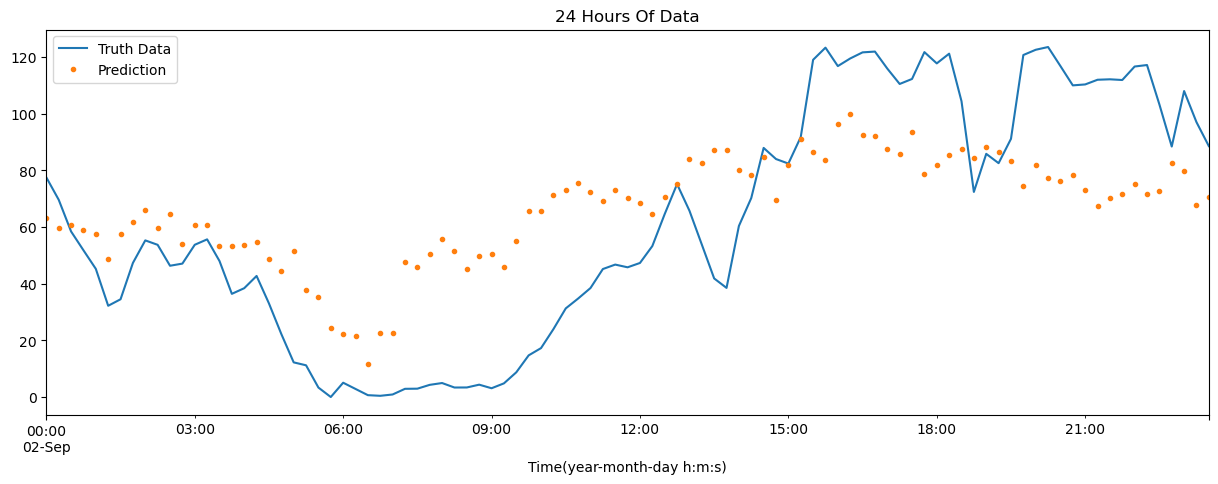

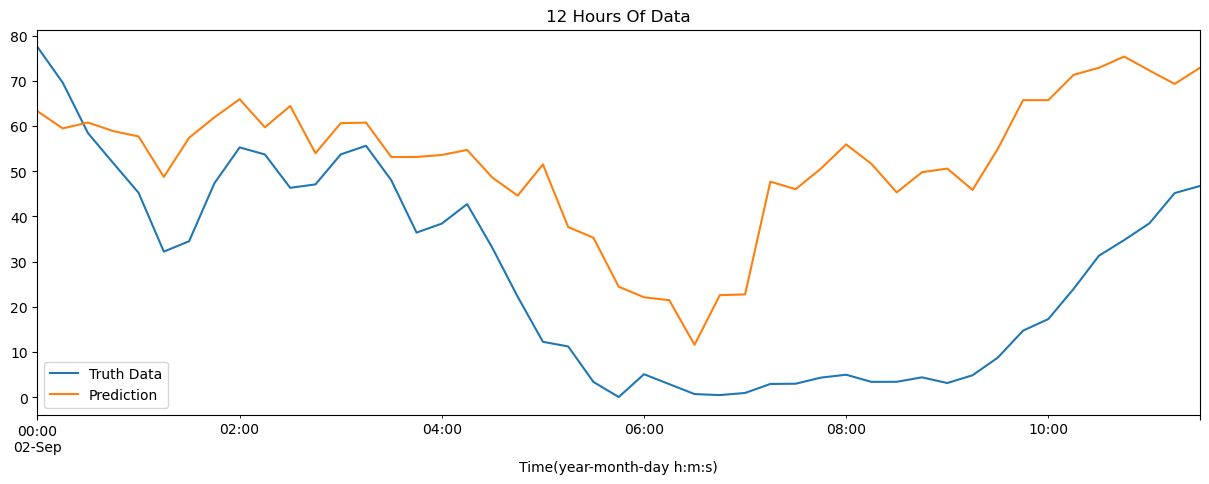

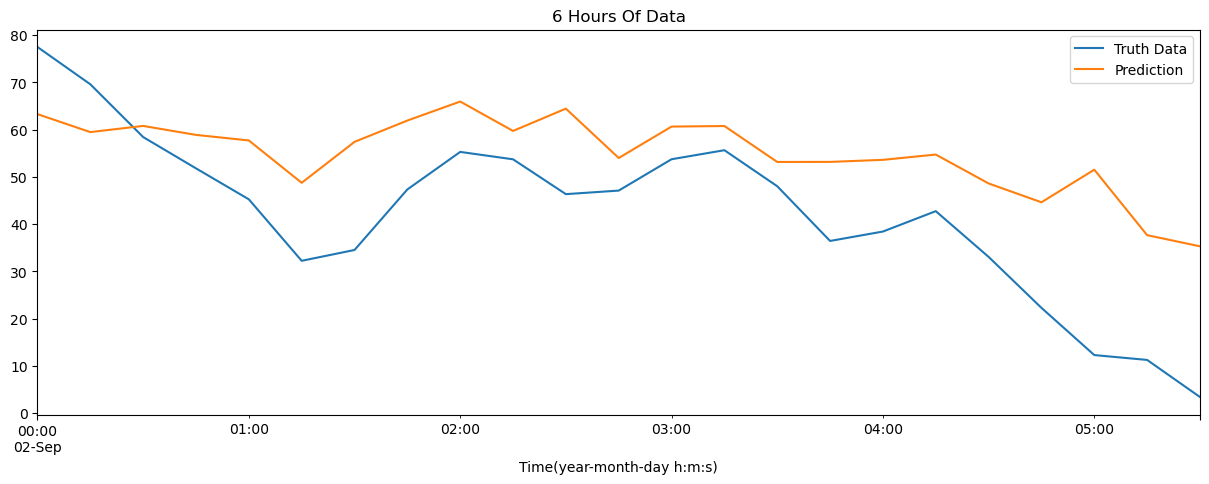

MAPE:  26.58829903499907
MAE:  26.018373038867686
MASE:  5.252430521013742
MSE:  1087.3341115951707
RMSE:  32.97474960625434


/Users/Gautam/anaconda3arm/anaconda3/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:477: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(


In [58]:
compute_forecast(Dataset_WF_site2)

                            OLS Regression Results                            
Dep. Variable:             Power (MW)   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                 4.040e+04
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        10:04:54   Log-Likelihood:            -2.0438e+05
No. Observations:               52631   AIC:                         4.088e+05
Df Residuals:                   52626   BIC:                         4.088e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

/var/folders/tl/_v6g46bs3cx9m65hytfp0q1w0000gp/T/ipykernel_69578/2579641709.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Pred'] = y_pred


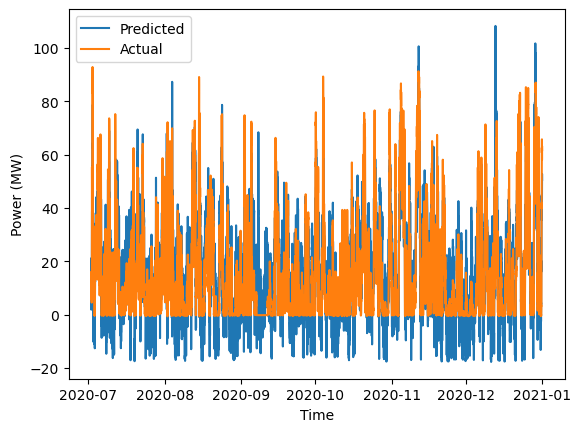

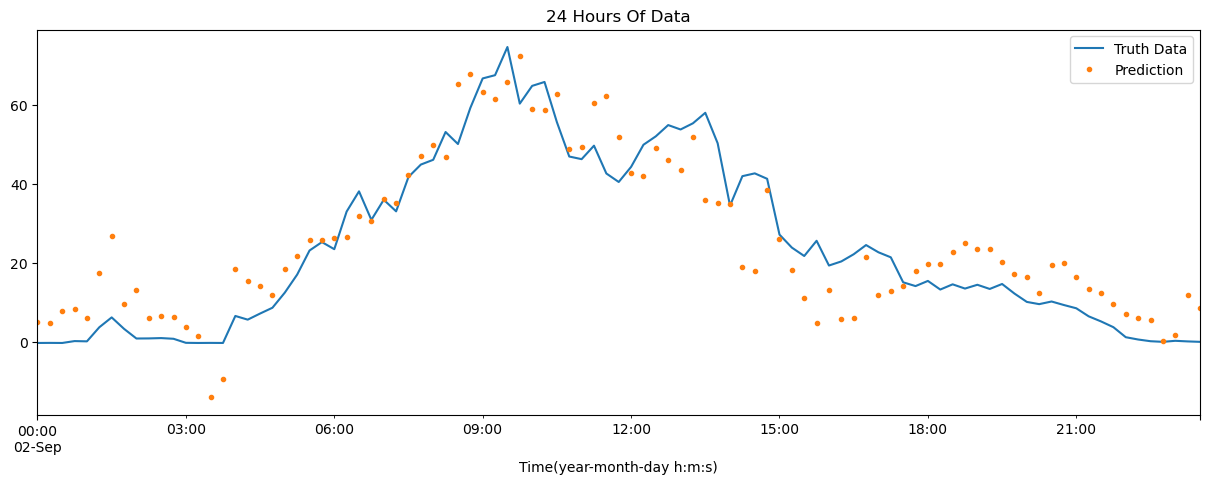

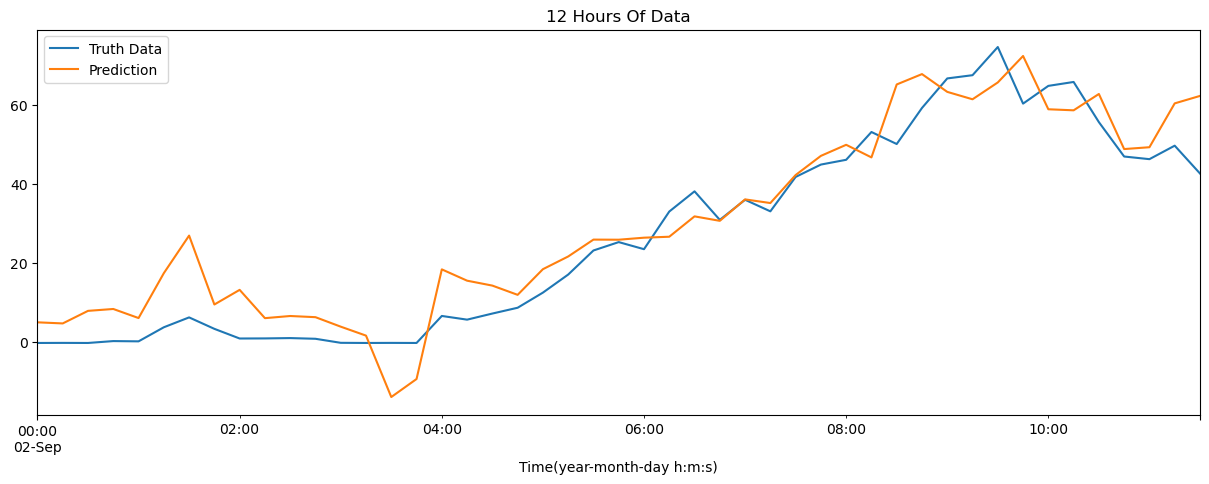

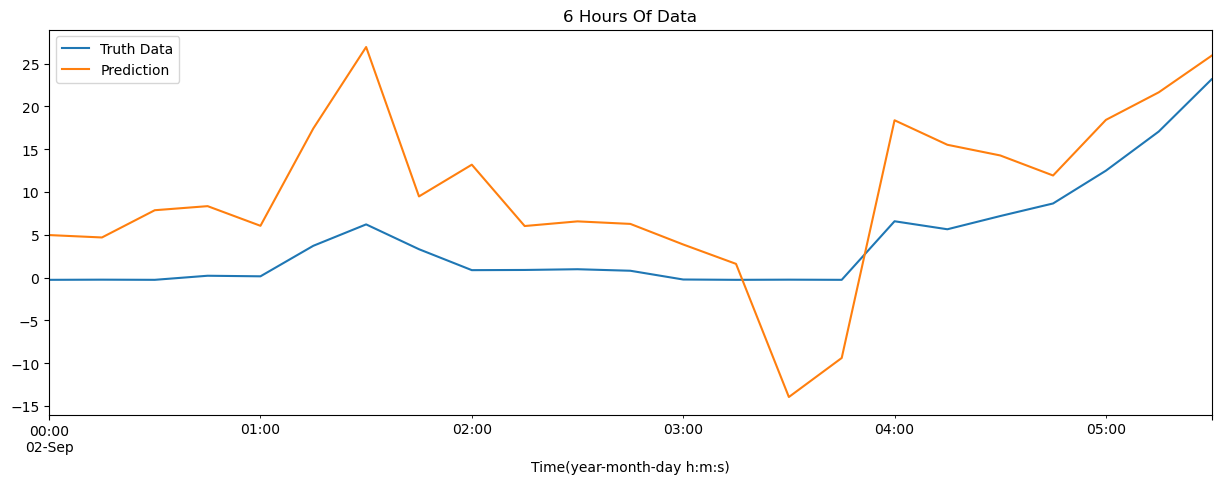

MAPE:  212671.36183279377
MAE:  8.035521037061184
MASE:  3.783334840046678
MSE:  104.43189550894965
RMSE:  10.219192507676409


/Users/Gautam/anaconda3arm/anaconda3/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:477: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(


In [59]:
compute_forecast(Dataset_WF_site3)